In [4]:
import sqlite3 as sql
import pandas as pd
cn = sql.connect("factbook.db")
df = pd.read_sql_query("select * from facts", cn)

In [6]:
q3 = '''
select min(population) min_pop, max(population) max_pop, 
min(population_growth) min_pop_grwth, max(population_growth) max_pop_grwth 
from facts
'''
pd.read_sql_query(q3, cn)

min_pop     max_pop  min_pop_grwth  max_pop_grwth
0        0  7256490011            0.0           4.02

In [8]:
q4 = '''
select *
from facts
where population == (select max(population) from facts)
or population == (select min(population) from facts);
'''

pd.read_sql_query(q4, cn)

id code        name  area  area_land area_water  population  \
0  250   ay  Antarctica  None   280000.0       None           0   
1  261   xx       World  None        NaN       None  7256490011   

   population_growth  birth_rate  death_rate migration_rate  
0                NaN         NaN         NaN           None  
1               1.08        18.6         7.8           None

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc79c0c61d0>,
      dtype=object)

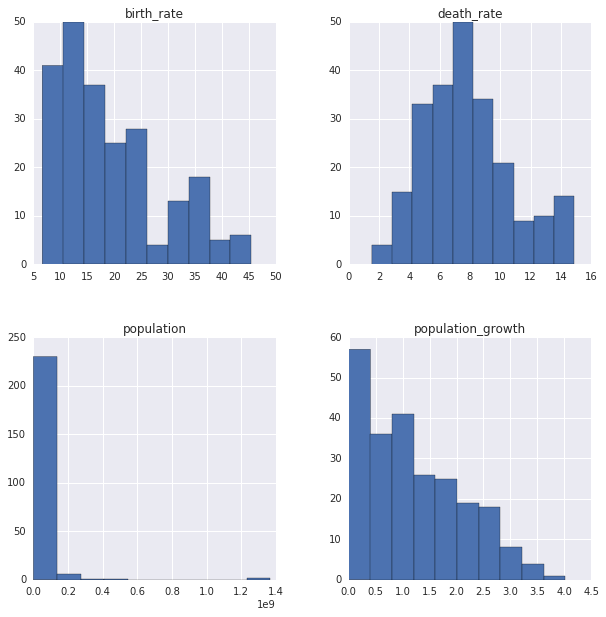

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, cn).hist(ax=ax)